In [89]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [71]:
def sigmoid(y_pred):
    return 1 / (1 + math.exp(-y_pred))

def log_loss_results(model, X, y):
    results = []
    for pred in model.staged_decision_function(X):
        results.append(log_loss(y, [sigmoid(y_pred) for y_pred in pred]))
    return results

In [72]:
data = pd.read_csv('gbm-data.csv')

In [73]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X = data.drop('Activity', axis=1).values
y = data[['Activity']].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [82]:
learning_rate_list = [1, 0.5, 0.3, 0.2, 0.1, 0.01]
myDict = {}

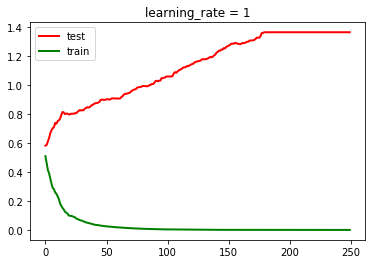

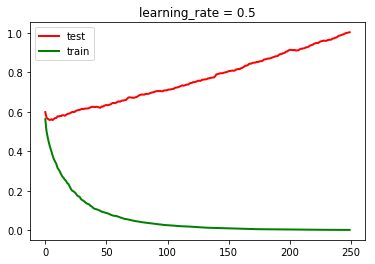

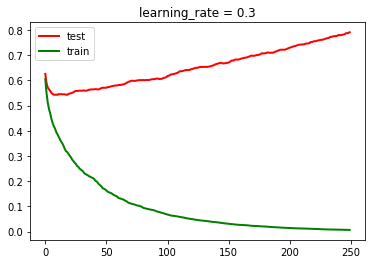

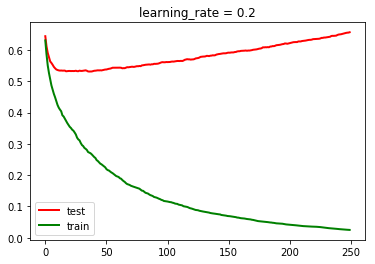

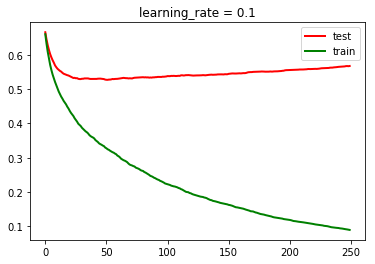

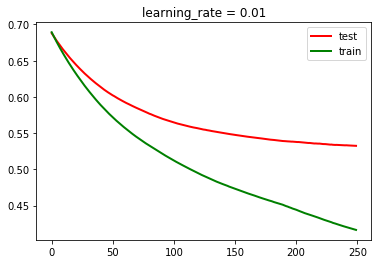

In [83]:
for i in tqdm(range(len(learning_rate_list))):
    GBC = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=learning_rate_list[i])
    GBC.fit(X_train, y_train)    
    train_log_loss = log_loss_results(GBC, X_train, y_train)
    test_log_loss = log_loss_results(GBC, X_test, y_test)
    myDict[learning_rate_list[i]] = (min(test_log_loss), test_log_loss.index(min(test_log_loss)))
    plt.figure()
    plt.plot(test_log_loss, 'r', linewidth=2)
    plt.plot(train_log_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title('learning_rate = {0}'.format(learning_rate_list[i]))

In [92]:
# Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? 

# Запись ответа
output1 = open('week5_2_1.txt', 'w')
print(
    'overfitting',
    file=output1, 
    end='', 
    sep=' '
)
output1.close()

In [100]:
# Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2

# Запись ответа
output1 = open('week5_2_2.txt', 'w')
print(
    ' '.join(list(map(lambda x: str(round(x, 2)), myDict[0.2]))),
    file=output1, 
    end='', 
    sep=' '
)
output1.close()

In [90]:
RFC = RandomForestClassifier(random_state=241, n_estimators=myDict[0.2][1])
RFC.fit(X_train, y_train)
print(log_loss(y_test, RFC.predict_proba(X_test)))

0.5413812861804069


In [99]:
# Какое значение log-loss на тесте получается у этого случайного леса?

# Запись ответа
output1 = open('week5_2_3.txt', 'w')
print(
    round(log_loss(y_test, RFC.predict_proba(X_test)), 2),
    file=output1, 
    end='', 
    sep=' '
)
output1.close()